In [1]:
import pandas as pd
import numpy as np

# Paramètres
n_nodes = 50  # Nombre de nœuds
np.random.seed(42)  # Pour la reproductibilité

# Génération des données aléatoires
data = {
    'node_id': np.arange(1, n_nodes + 1),
    'cpu_usage': np.random.randint(10, 100, size=n_nodes),  # Usage CPU entre 10% et 100%
    'memory_usage': np.random.randint(10, 100, size=n_nodes),  # Usage mémoire entre 10% et 100%
    'disk_usage': np.random.randint(10, 100, size=n_nodes)  # Usage disque entre 10% et 100%
}

# Création d'un DataFrame
df = pd.DataFrame(data)

# Affichage des premières lignes
print(df.head())

# Enregistrement du DataFrame en fichier CSV
df.to_csv('node_metrics.csv', index=False)

print("Fichier node_metrics.csv généré avec succès.")


   node_id  cpu_usage  memory_usage  disk_usage
0        1         61            23          98
1        2         24            18          80
2        3         81            99          18
3        4         70            62          97
4        5         30            11          10
Fichier node_metrics.csv généré avec succès.


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
data = pd.read_csv('node_metrics.csv')
data.head()

,node_id,cpu_usage,memory_usage,disk_usage
0,1,61,23,98
1,2,24,18,80
2,3,81,99,18
3,4,70,62,97
4,5,30,11,10


In [3]:
# Sélection des features pour le clustering
X = data[['cpu_usage', 'memory_usage', 'disk_usage']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Affichage des données standardisées
print(X_scaled)

[[ 0.15951226 -1.21917624  1.53463334]
 [-1.22592286 -1.40049334  0.93150233]
 [ 0.90839611  1.53684381 -1.14594891]
 [ 0.49650999  0.19509721  1.50112606]
 [-1.0012577  -1.6543373  -1.41400713]
 [ 1.32028222  1.31926328 -1.17945619]
 [ 1.47005899  0.44894116  1.50112606]
 [ 1.02072868  0.8478388   0.66344411]
 [ 1.02072868 -0.13127359 -1.07893435]
 [ 1.50750319 -1.43675677  1.26657511]
 [-0.88892513 -0.02248332 -1.17945619]
 [-1.67525317 -0.45764438 -0.27475968]
 [-0.96381351  1.10168275 -0.27475968]
 [ 0.19695645  1.21047302 -0.34177424]
 [-1.71269736 -0.42138096 -1.27997802]
 [ 1.50750319  0.08630694 -0.07371601]
 [-0.66425997 -1.58181045 -0.50931063]
 [-0.36470643 -1.6543373  -1.21296347]
 [-1.71269736 -1.50928361  0.99851689]
 [ 0.60884257  0.23136063  0.96500961]
 [ 0.4590658  -1.58181045 -1.04542708]
 [-1.0012577   0.23136063 -0.30826696]
 [-0.5519274   0.55773143 -0.34177424]
 [ 1.05817288 -1.07412255  0.16083493]
 [ 0.38417741  1.53684381 -0.67684702]
 [-0.96381351 -0.13127359

### Cluster 0 : Nœuds avec un usage moyen des ressources.
### Cluster 1 : Nœuds avec un usage faible (potentiellement sous-utilisés).
### Cluster 2 : Nœuds avec un usage élevé (potentiellement surchargés).

In [4]:
# Définition du modèle K-Means avec 3 clusters (vous pouvez ajuster le nombre de clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Entraînement du modèle
kmeans.fit(X_scaled)

# Ajouter les labels des clusters à notre DataFrame
data['cluster'] = kmeans.labels_

# Affichage des résultats
data.head(5)

C:\Users\OUAZZE\.conda\envs\tp\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,node_id,cpu_usage,memory_usage,disk_usage,cluster
0,1,61,23,98,2
1,2,24,18,80,0
2,3,81,99,18,1
3,4,70,62,97,2
4,5,30,11,10,0


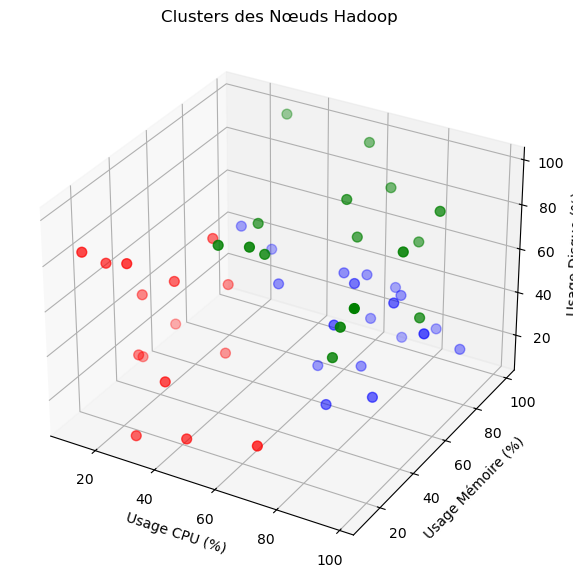

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green']
ax.scatter(data['cpu_usage'], data['memory_usage'], data['disk_usage'], 
           c=data['cluster'].apply(lambda x: colors[x]), s=50)

ax.set_xlabel('Usage CPU (%)')
ax.set_ylabel('Usage Mémoire (%)')
ax.set_zlabel('Usage Disque (%)')

plt.title('Clusters des Nœuds Hadoop')
plt.show()